In [25]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
import json
import numpy as np
import pandas as pd
from swbm import seasonal_sinus
from plots import *
#import os
#os.chdir('..')

In [12]:
# Load best parameters from model test
with open('../results/ger_test_eval.json', 'r') as file:
    ger_calib = json.load(file)

with open('../results/swe_test_eval.json', 'r') as file:
    swe_calib = json.load(file)

with open('../results/esp_test_eval.json', 'r') as file:
    esp_calib = json.load(file)

calibs = [swe_calib, ger_calib, esp_calib]

In [13]:
# Load best parameters from model test without seasonal variation
with open('../results/ger_nonseasonal_test.json', 'r') as file:
    ger_calib_non = json.load(file)

with open('../results/swe_nonseasonal_test.json', 'r') as file:
    swe_calib_non = json.load(file)

with open('../results/esp_nonseasonal_test.json', 'r') as file:
    esp_calib_non = json.load(file)

calibs_non = [swe_calib_non, ger_calib_non, esp_calib_non]

In [14]:
# calculate diffrences
# seasonal correlations
countries = ['Sweden', 'Germany', 'Spain']
corr_types = ['sm_corr', 'ro_corr', 'le_corr']
data = []

for i, calib in enumerate(calibs):
    country_data = []
    for corr_type in corr_types:
        country_corr = [calib[j][corr_type] for j in range(len(calib)) if corr_type in calib[j]]
        country_data.append(country_corr[0])  # Appending only the value
    data.append(country_data)

# nonseasonal correlations
new_corr_types = ['sm_corr', 'ro_corr', 'le_corr']
new_data = []

for i, calib_non in enumerate(calibs_non):
    country_data = []
    for corr_type in new_corr_types:
        country_corr = [calib_non[j][corr_type] for j in range(len(calib_non)) if corr_type in calib_non[j]]
        country_data.append(country_corr[0])  # Appending only the value
    new_data.append(country_data)

# Calculate differences
diff_data = abs(np.array(new_data) - np.array(data))

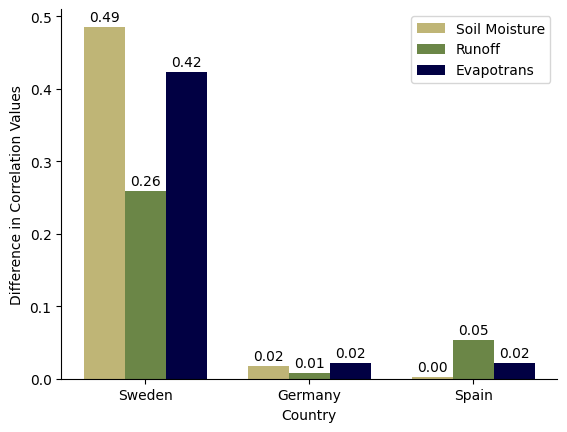

In [5]:
bar_width = 0.25
index = np.arange(len(countries))

fig, ax = plt.subplots()
for i in range(len(corr_types)):
    colors = ['#BFB576', '#6B8647', '#010043']  # Colors for Germany, Sweden, and Spain respectively
    bars = ax.bar([x + i * bar_width for x in index], 
                  [row[i] for row in diff_data], bar_width, label=corr_types[i], color=colors[i])
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Country')
ax.set_ylabel('Difference in Correlation Values')
#ax.set_title('Differences in Correlation Values by Country')
ax.set_xticks([x + (2*bar_width) / 2 for x in index])
ax.set_xticklabels(countries)
ax.legend(labels=['Soil Moisture', 'Runoff', 'Evapotrans'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../figs/corr_diff_bar.pdf', dpi=300, bbox_inches='tight')

plt.show()

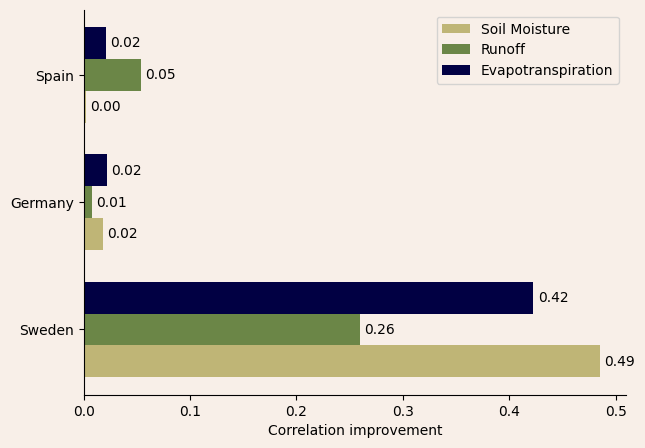

In [15]:
bar_height = 0.25
index = np.arange(len(countries))

fig, ax = plt.subplots(figsize = (7, 5))
fig.set_facecolor('#F8EFE8')
for i in range(len(corr_types)):
    colors = ['#BFB576', '#6B8647', '#010043']  # Colors for Germany, Sweden, and Spain respectively
    bars = ax.barh([y + i * bar_height for y in index], [row[i] for row in diff_data], bar_height, label=corr_types[i], color=colors[i])
    for j, bar in enumerate(bars):
        width = bar.get_width()
        ax.annotate('{:.2f}'.format(width),
                    xy=(width, bar.get_y() + bar_height / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

#ax.set_ylabel('Country')
ax.set_xlabel('Correlation improvement')
# ax.set_title('Differences in Correlation Values by Country')
ax.set_yticks([y + (2 * bar_height) / 2 for y in index])
ax.set_yticklabels(countries)
legend = ax.legend(labels=['Soil Moisture', 'Runoff', 'Evapotranspiration'])
legend.get_frame().set_facecolor('#F8EFE8')  # Set background color of the legend

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('#F8EFE8')

plt.savefig('../figs/corr_diff_bar_h.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
sin_param = calibs[0][3]

In [8]:
sin_param

{'amplitude': 1.6985309793181464,
 'freq': 1.994578129227375,
 'phase': 4.551675054304051,
 'center': -0.6437874433691276}

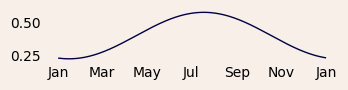

In [88]:
from matplotlib.dates import MonthLocator, DateFormatter
start_date = '2013-01-01'
end_date = '2013-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

fig, ax = plt.subplots(figsize=(3.5, 1))

# Getting sinus paramter
sin_param = calibs[0][3]

# Plotting the curve
plt.plot(date_range, seasonal_sinus(len(date_range), 
                                    amplitude=sin_param['amplitude'],
                                    freq=sin_param['freq'], 
                                    phase=sin_param['phase'], 
                                    center=sin_param['center'], 
                                    which='b0'), color='#010043')

# Set x-axis ticks to show only every second month
plt.gca().xaxis.set_major_locator(MonthLocator(interval=2))
plt.gca().xaxis.set_major_formatter(DateFormatter('%b'))

# Remove axis ticks
plt.gca().tick_params(axis='both', which='both', length=0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_facecolor('#F8EFE8')
fig.set_facecolor('#F8EFE8')

plt.tight_layout()

plt.savefig('../figs/sinus_swe.png', dpi=300, bbox_inches='tight')
plt.savefig('../figs/sinus_swe.pdf', dpi=300, bbox_inches='tight')

plt.show()

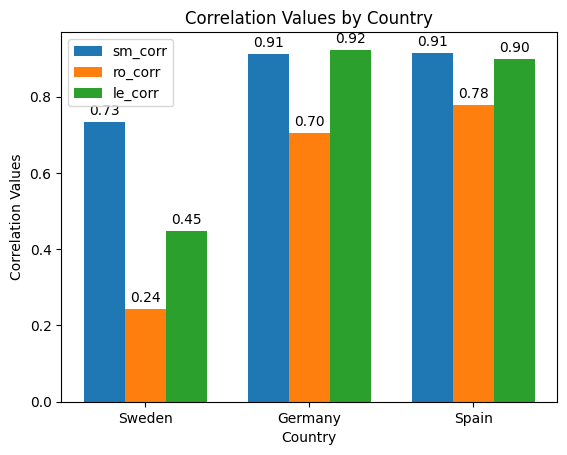

In [10]:
fig, ax = plt.subplots()
for i in range(len(corr_types)):
    bars = ax.bar([x + i * bar_width for x in index], [row[i] for row in data], bar_width, label=corr_types[i])
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Country')
ax.set_ylabel('Correlation Values')
ax.set_title('Correlation Values by Country')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(countries)
ax.legend()

plt.show()

# Plot Data - Sweden

/var/folders/f8/v13bbmv53_z7q9w1_d8cgy780000gn/T/ipykernel_35526/2168478167.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


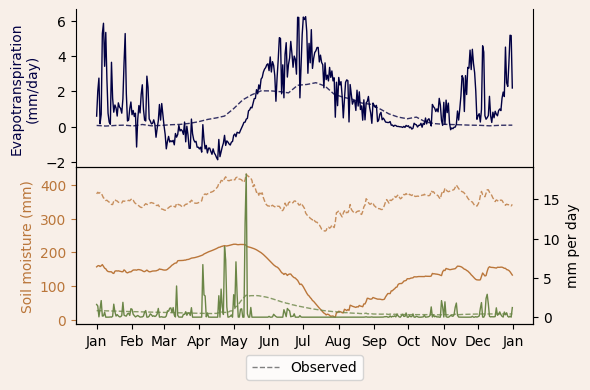

In [89]:
plt.rcParams['lines.linewidth'] = 1.0

swe_model = pd.read_csv('../data/output/swe_model_test.csv')
swe_const = pd.read_csv('../data/output/swe_nonseasonal_test.csv')

colors = ['#BA763A', '#6B8647', '#010043']  # sm, ro, et

year_mask = np.asarray([True if '2018' in t else False for t in swe_model['time']])

fig, ax = plt.subplots(nrows=2, figsize=(6, 4), sharex=True, gridspec_kw={'hspace': 0})

ax[0].plot(swe_model['ets_seasonal'][year_mask], color=colors[2])
line, = ax[0].plot(swe_model['le'][year_mask], linestyle='dashed', color=colors[2], alpha=0.8)
ax[0].set_ylabel('Evapotranspiration\n(mm/day)', color=colors[2])

# Remove x-axis spine, ticks, and labels
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_xlabel('')  # Set an empty label to remove x-axis label
ax[0].spines['bottom'].set_visible(False)  # Remove x-axis spine
ax[0].spines['top'].set_visible(False)

ax2 = ax[1].twinx()
ax[1].plot(swe_model['moists_seasonal'][year_mask], color=colors[0])
ax[1].plot(swe_model['sm'][year_mask], color=colors[0], linestyle='dashed', alpha=0.8)
ax2.plot(swe_model['runoffs_seasonal'][year_mask], color=colors[1])
ax2.plot(swe_model['ro'][year_mask], color=colors[1], linestyle='dashed', alpha=0.8)

ax[1].yaxis.label.set_color(colors[0])
ax[1].tick_params(axis='y', colors=colors[0])
ax[1].set_ylabel('Soil moisture (mm)')
ax[1].xaxis.set_major_locator(MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b'))

ax2.set_ylabel('mm per day')

# Custom legend handler with a different color
legend_handler = plt.Line2D([0], [0], linestyle='dashed', color='grey', label='Observed')
ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[0].set_facecolor('#F8EFE8')
ax[1].set_facecolor('#F8EFE8')
fig.set_facecolor('#F8EFE8')

plt.tight_layout()
plt.savefig('../figs/ts_swe.pdf', bbox_inches='tight')

# Spain

/var/folders/f8/v13bbmv53_z7q9w1_d8cgy780000gn/T/ipykernel_35526/1374071551.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


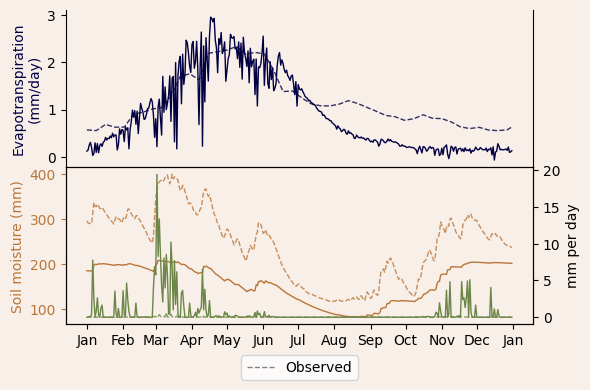

In [90]:
plt.rcParams['lines.linewidth'] = 1.0

swe_model = pd.read_csv('../data/output/esp_model_test.csv')
swe_const = pd.read_csv('../data/output/esp_nonseasonal_test.csv')

colors = ['#BA763A', '#6B8647', '#010043']  # sm, ro, et

year_mask = np.asarray([True if '2018' in t else False for t in swe_model['time']])

fig, ax = plt.subplots(nrows=2, figsize=(6, 4), sharex=True, gridspec_kw={'hspace': 0})

ax[0].plot(swe_model['ets_seasonal'][year_mask], color=colors[2])
line, = ax[0].plot(swe_model['le'][year_mask], linestyle='dashed', color=colors[2], alpha=0.8)
ax[0].set_ylabel('Evapotranspiration\n(mm/day)', color=colors[2])

# Remove x-axis spine, ticks, and labels
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_xlabel('')  # Set an empty label to remove x-axis label
ax[0].spines['bottom'].set_visible(False)  # Remove x-axis spine
ax[0].spines['top'].set_visible(False)

ax2 = ax[1].twinx()
ax[1].plot(swe_model['moists_seasonal'][year_mask], color=colors[0])
ax[1].plot(swe_model['sm'][year_mask], color=colors[0], linestyle='dashed', alpha=0.8)
ax2.plot(swe_model['runoffs_seasonal'][year_mask], color=colors[1])
ax2.plot(swe_model['ro'][year_mask], color=colors[1], linestyle='dashed', alpha=0.8)

ax[1].yaxis.label.set_color(colors[0])
ax[1].tick_params(axis='y', colors=colors[0])
ax[1].set_ylabel('Soil moisture (mm)')
ax[1].xaxis.set_major_locator(MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b'))

ax2.set_ylabel('mm per day')

# Custom legend handler with a different color
legend_handler = plt.Line2D([0], [0], linestyle='dashed', color='grey', label='Observed')
ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[0].set_facecolor('#F8EFE8')
ax[1].set_facecolor('#F8EFE8')
fig.set_facecolor('#F8EFE8')

plt.tight_layout()

# Germany

/var/folders/f8/v13bbmv53_z7q9w1_d8cgy780000gn/T/ipykernel_35526/4289218766.py:38: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)


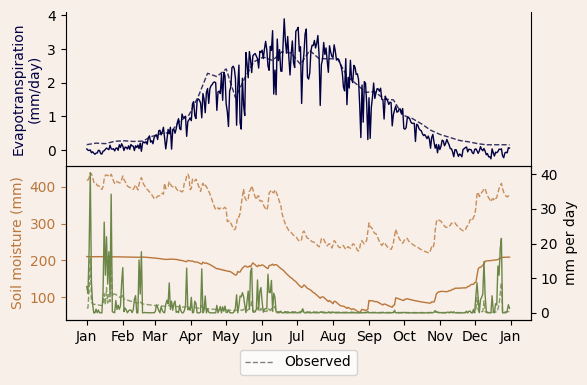

In [93]:
plt.rcParams['lines.linewidth'] = 1.0

swe_model = pd.read_csv('../data/output/ger_model_test.csv')
swe_const = pd.read_csv('../data/output/ger_nonseasonal_test.csv')

colors = ['#BA763A', '#6B8647', '#010043']  # sm, ro, et

year_mask = np.asarray([True if '2018' in t else False for t in swe_model['time']])

fig, ax = plt.subplots(nrows=2, figsize=(6, 4), sharex=True, gridspec_kw={'hspace': 0})

ax[0].plot(swe_model['ets_seasonal'][year_mask], color=colors[2])
line, = ax[0].plot(swe_model['le'][year_mask], linestyle='dashed', color=colors[2], alpha=0.8)
ax[0].set_ylabel('Evapotranspiration\n(mm/day)', color=colors[2])

# Remove x-axis spine, ticks, and labels
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax[0].set_xlabel('')  # Set an empty label to remove x-axis label
ax[0].spines['bottom'].set_visible(False)  # Remove x-axis spine
ax[0].spines['top'].set_visible(False)

ax2 = ax[1].twinx()
ax[1].plot(swe_model['moists_seasonal'][year_mask], color=colors[0])
ax[1].plot(swe_model['sm'][year_mask], color=colors[0], linestyle='dashed', alpha=0.8)
ax2.plot(swe_model['runoffs_seasonal'][year_mask], color=colors[1])
ax2.plot(swe_model['ro'][year_mask], color=colors[1], linestyle='dashed', alpha=0.8)

ax[1].yaxis.label.set_color(colors[0])
ax[1].tick_params(axis='y', colors=colors[0])
ax[1].set_ylabel('Soil moisture (mm)')
ax[1].xaxis.set_major_locator(MonthLocator(interval=1))
ax[1].xaxis.set_major_formatter(DateFormatter('%b'))

ax2.set_ylabel('mm per day')

# Custom legend handler with a different color
legend_handler = plt.Line2D([0], [0], linestyle='dashed', color='grey', label='Observed')
ax[1].legend(handles=[line, legend_handler], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

ax[0].set_facecolor('#F8EFE8')
ax[1].set_facecolor('#F8EFE8')
fig.set_facecolor('#F8EFE8')

plt.rcParams['lines.linewidth'] = 1.0

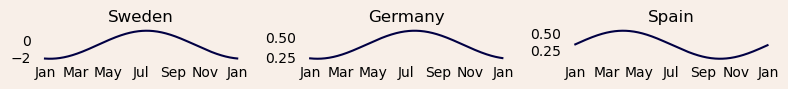

In [65]:


# Generating date range (for example, one year)
start_date = '2013-01-01'
end_date = '2013-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

fig, axes = plt.subplots(1, 3, figsize=(8, 1))

# Loop through each subplot
for i, ax in enumerate(axes):
    # Getting sinus parameter for current subplot
    sin_param = calibs[i][3]

    # Plotting the curve
    ax.plot(date_range, seasonal_sinus(len(date_range), 
                                        amplitude=sin_param['amplitude'],
                                        freq=sin_param['freq'], 
                                        phase=sin_param['phase'], 
                                        center=sin_param['center'], 
                                        which='b0'), color='#010043')

    # Set x-axis ticks to show only every second month
    ax.xaxis.set_major_locator(MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(DateFormatter('%b'))

    # Set x-axis limits to the minimum and maximum dates in the data
    #ax.set_xlim(date_range.min(), date_range.max())

    # Remove axis ticks
    ax.tick_params(axis='both', which='both', length=0)

    # Remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_facecolor('#F8EFE8')
    fig.set_facecolor('#F8EFE8')

    # Set subplot title
    if i == 0:
        ax.set_title('Sweden')
    elif i == 1:
        ax.set_title('Germany')
    elif i == 2:
        ax.set_title('Spain')

plt.tight_layout()
plt.savefig('../figs/sinus.pdf', bbox_inches='tight')
plt.show()